# Perkenalan

- Nama: Muhamad Afif Thufail
- Batch : FTDS Batch 10
- Dataset : Telco Customer Churn


# Import Library

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Loading

In [4]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Terdapat 20 kolom dan 7043 baris pada dataset tersebut. 1 kolom bertipe float, 2 kolom bertipe integer, dan 18 kolom bertipe object

In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Tidak ada missing values pada dataset tersebut.

In [7]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Kolom SeniorCitizen kemungkinan adalah kolom dengan tipe data boolean.

# Exploratory Data Analysis

In [8]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Terdapat 2 output yaitu No dan Yes, output-output tersebut perlu dilakukan perubahan menjadi No = 0 dan Yes = 1

churn rate adalah tingkat atau persentase pelanggan memutus hubungan dengan sebuah bisnis atau perusahaan pada quarter tertentu. 
Sumber: https://www.investopedia.com/terms/c/churnrate.asp

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f911c7d9510>,
      dtype=object)

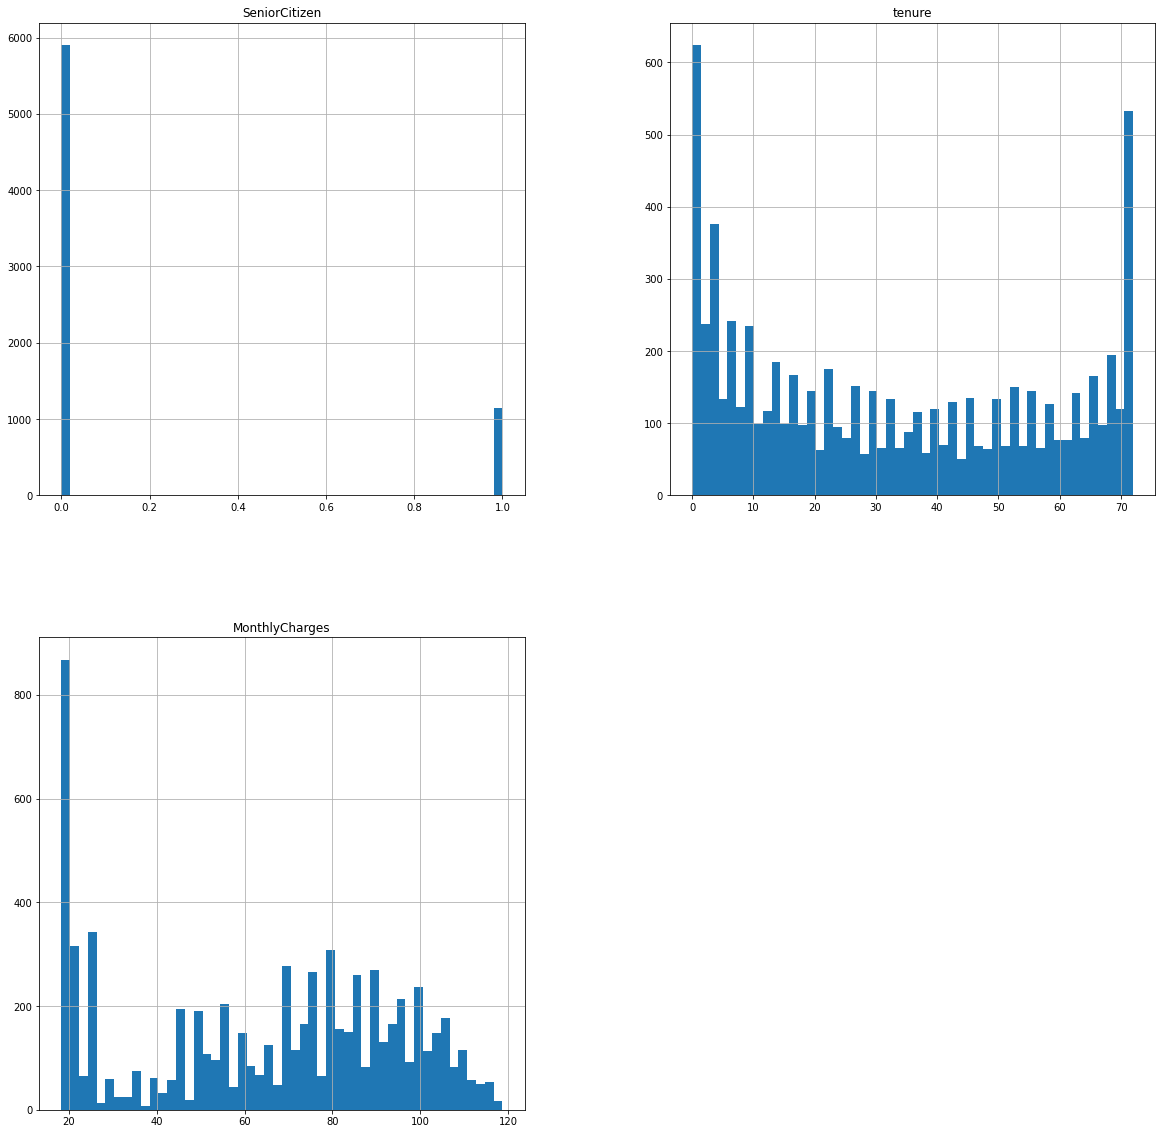

In [9]:
data.hist(figsize=(20,20), bins=50)

- Kolom SeniorCitizen merupakan kolom bertipe boolean dimana 0 kemungkinan adalah tidak dan 1 kemungkinan adalah iya

- Kebanyakan tenure berada pada nilai 0 dan 70

- Kebanyakan MonthlyCharges berada pada nilai 20

In [10]:
groupby_target = data.groupby('Churn').mean()
groupby_target

,SeniorCitizen,tenure,MonthlyCharges
Churn,,,
No,0.128721,37.569965,61.265124
Yes,0.254682,17.979133,74.441332


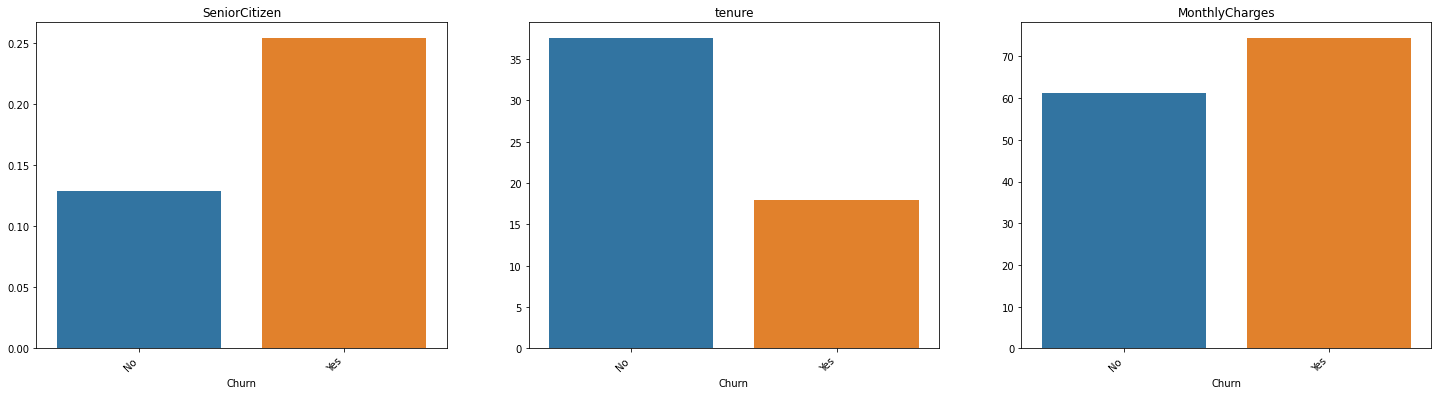

In [11]:
fig,axes=plt.subplots(1,3, figsize=(25,6))
axe= axes.ravel()
for i,col in enumerate(groupby_target.columns):
    sns.barplot(x=groupby_target[col].index, y=groupby_target[col].values, ax=axe[i])
    axe[i].set_xticklabels(axe[i].get_xticklabels(), rotation=45, ha='right')
    axe[i].set_title(col)
plt.show()

In [12]:
cat_data = data[[
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']]

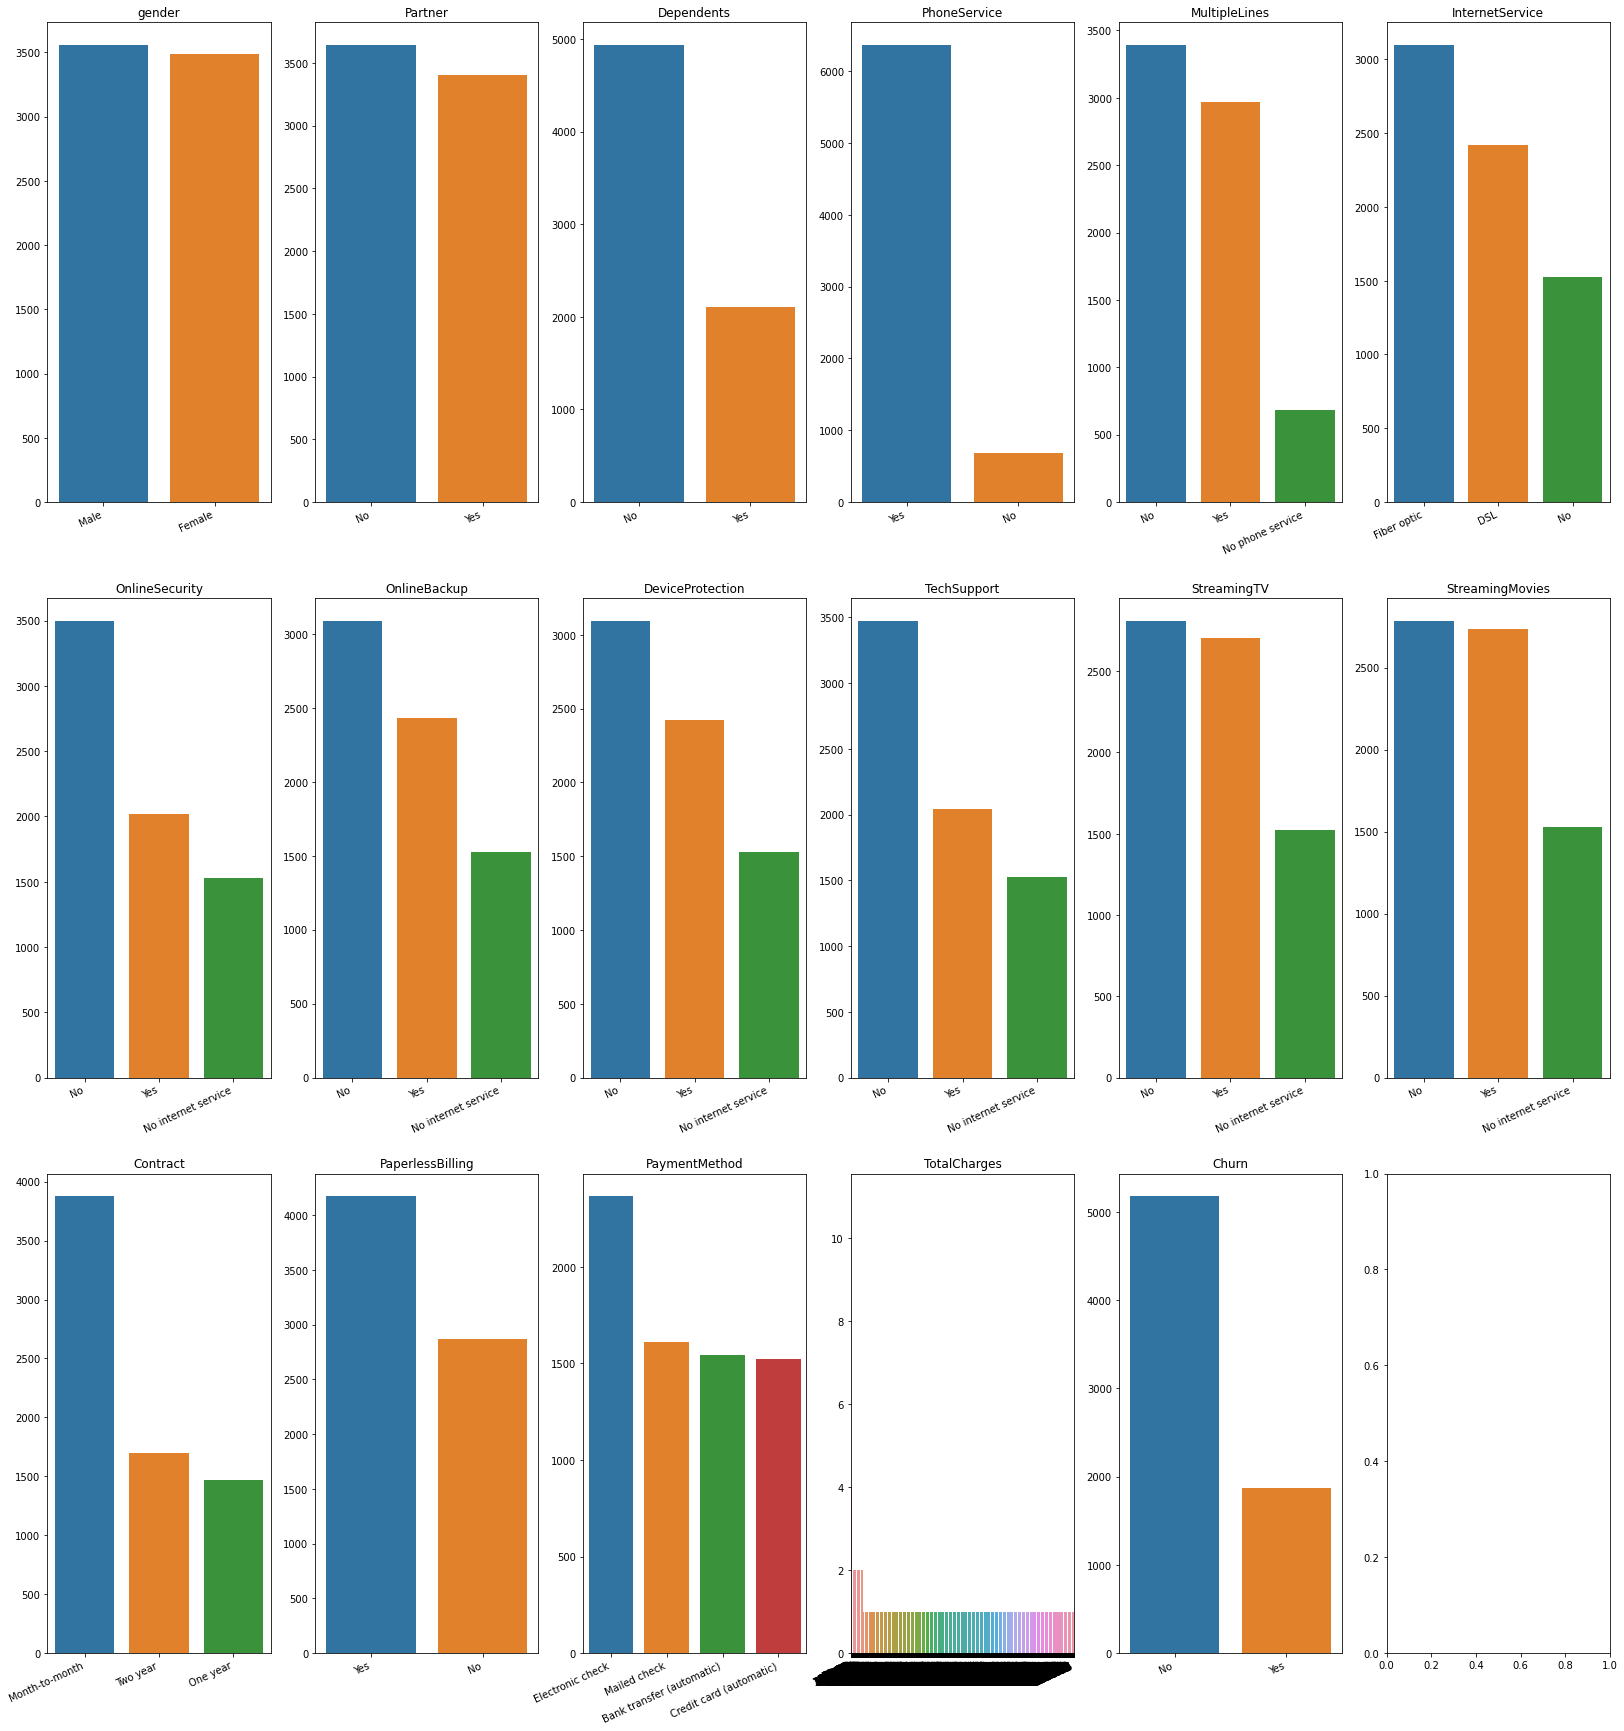

In [13]:
fig,axes=plt.subplots(3,6, figsize=(28,30))
axe=axes.ravel()
for i,col in enumerate(cat_data.columns):
    sns.barplot(x=cat_data[col].value_counts().index, y=cat_data[col].value_counts().values, ax=axe[i])
    axe[i].set_xticklabels(axe[i].get_xticklabels(), rotation=25, ha='right')
    axe[i].set_title(col)

In [14]:
data['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

Kolom TotalCharges seharsunya merupakan data bertipe float

- Jumlah wanita da pria hampir sama.

- Jumlah customer yang tidak memiliki pasangan lebih banyak sedikit daripada customer yang memiliki pasangan.

- Jumlah customer yang tidak memiliki tanggungan (dependents) dua kali lebih banyak dibandingkan customer yang memiliki tanggungan.

- Jumlah customer yang memiliki layanan telepon jauh lebih banyak dari yang tidak, kemungkinan ini berkaitan dengan seseorang yang senior citizen atau tidak.

- Kebanyakan customer tidak punya nomor telepon lebih dari satu, tetapi banyak juga customer yang punya nomor telepon lebih dari 1, dan hanya sedikit yang tidak memiliki nomor telepon.

- Kebanyakan customer memiliki layanan internet fiber optic, dan banyak juga yang layanan internetnya DSL. Namun ada cukup banyak juga customer yang tidak memiliki layanan internet.

- Kebanyakan customer tidak memiliki online security, online backup, device protection, dan tech support, sebagian lainnya memiliki keempatnya. 

- Customer yang tidak memiliki layanan Streaming TV dan Streaming Movies hampir sama banyaknya dengan customer yang memiliki kedua layanan tersebut.

- Kebanyakan customer memiliki kontrak month-to-month dan sebagiannya lagi kontraknya dua tahun dan satu tahun.

- Kebanyakan customer memiliki alat pembayaran non-tunai dan sebagiannya tidak memiliki alat pembayaran non-tunai.

- Kebanyakan customer melakukan metode pembayaran dengan electronic check dan sebagian lagi melakukan metode pembayaran dengan Mailed Check, transfer bank, dan kartu kredit.
 

In [15]:
data_2 = data[data['Churn']=='Yes']
data_2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes


In [16]:
cat_data2 = data_2[[
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']]

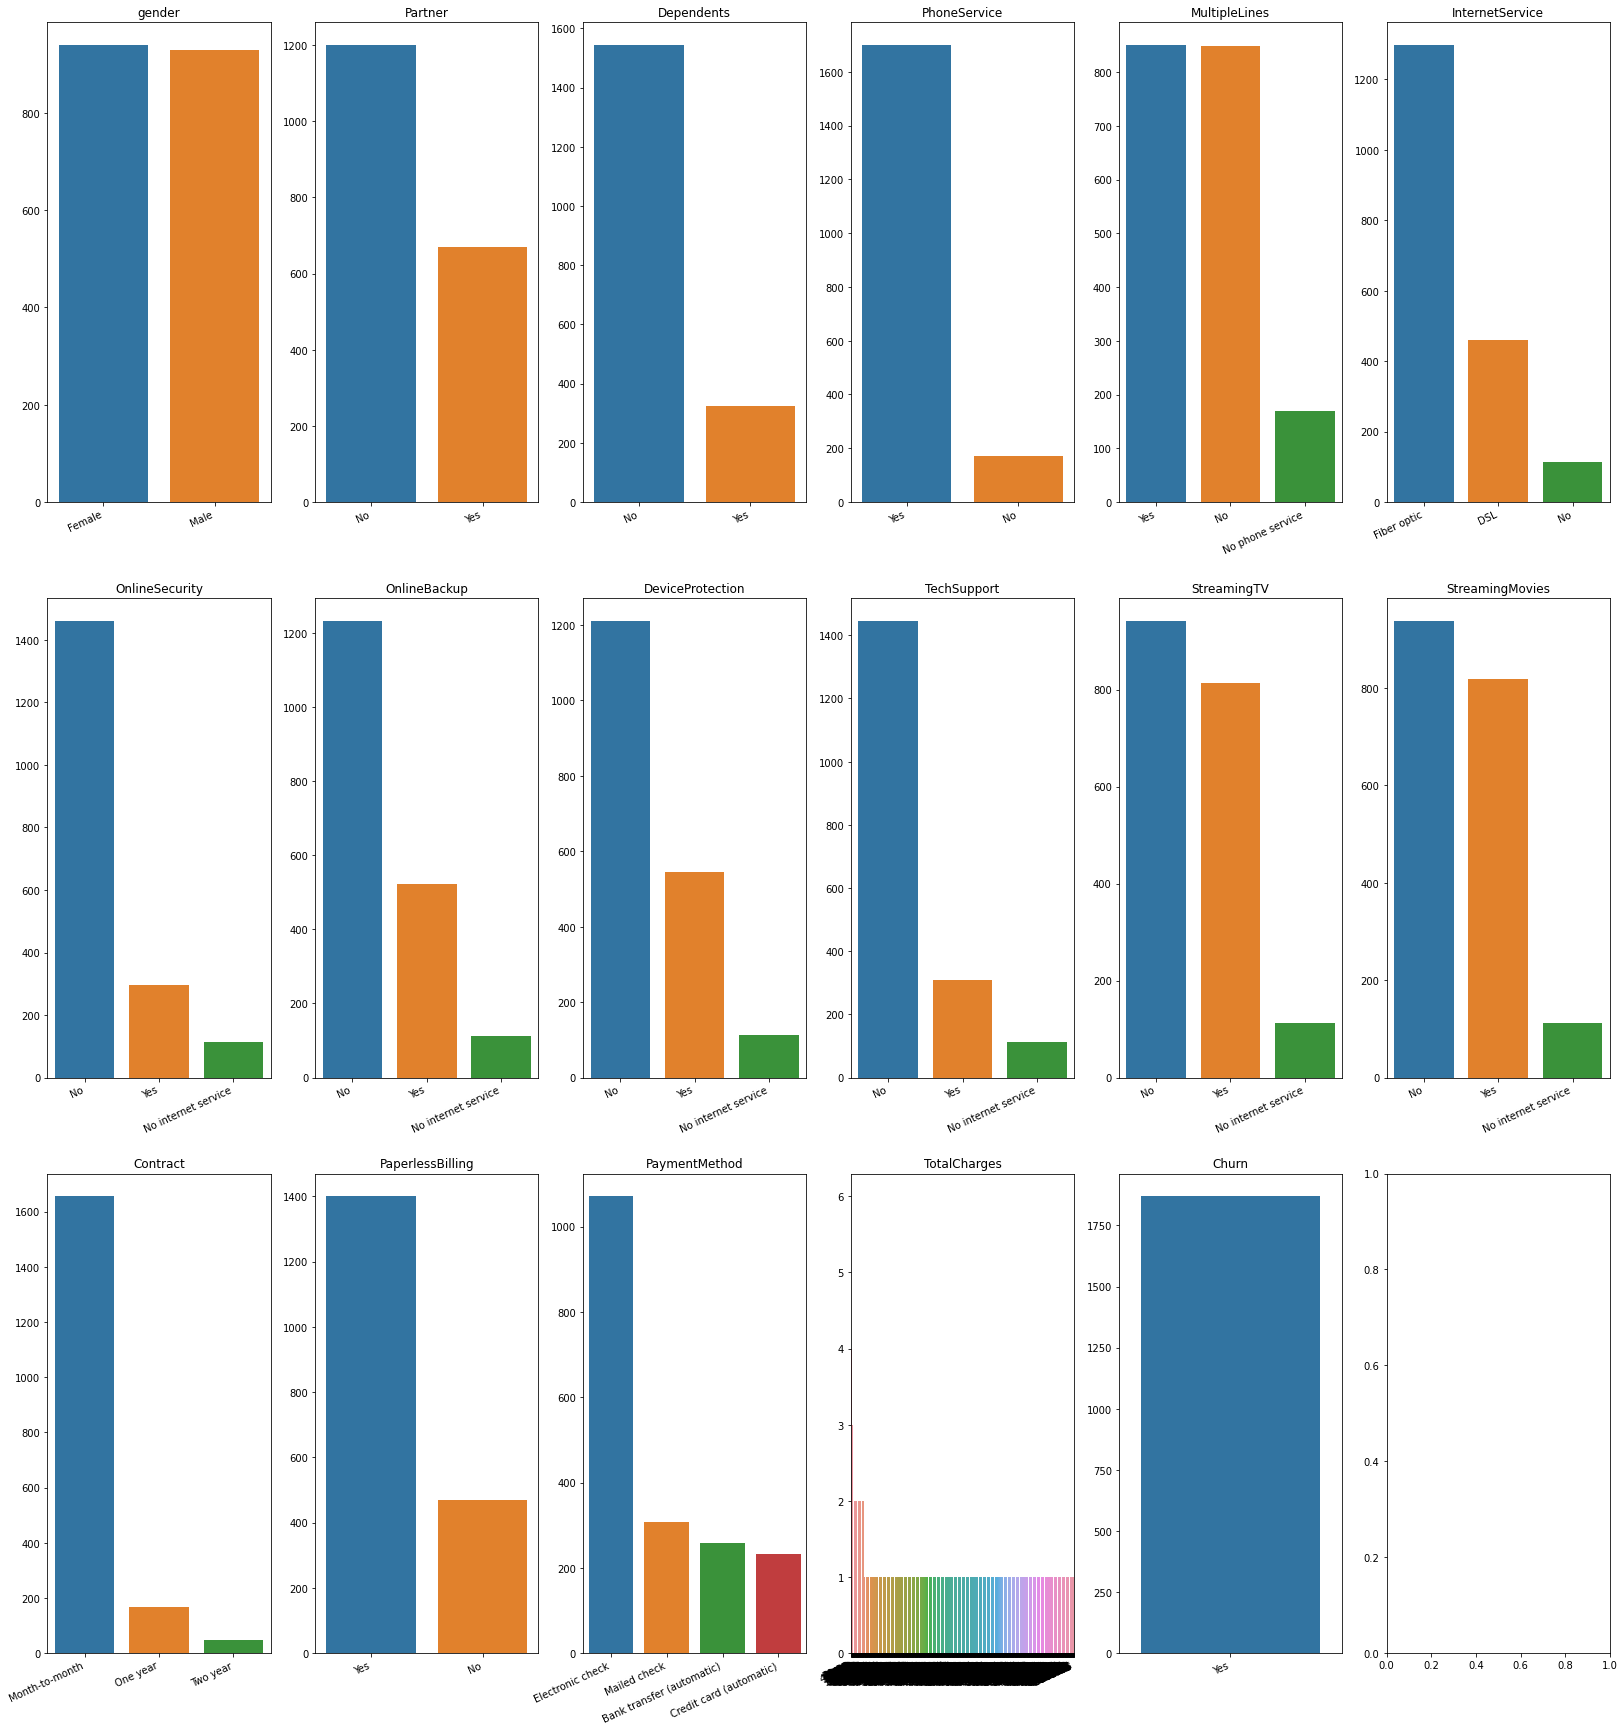

In [17]:
fig,axes=plt.subplots(3,6, figsize=(28,30))
axe=axes.ravel()
for i,col in enumerate(cat_data2.columns):
    sns.barplot(x=cat_data2[col].value_counts().index, y=cat_data2[col].value_counts().values, ax=axe[i])
    axe[i].set_xticklabels(axe[i].get_xticklabels(), rotation=25, ha='right')
    axe[i].set_title(col)

- Terdapat perbedaan yang signifikan customer yang melakukan churn terdapat pada kolom Online Security dan Contract.

- Customer yang memiliki pasangan cenderung untuk tidak melakukan churn.

- Customer yang melakukan churn pada kolom multiple lines jumlahnya yang memiliki nomor lebih dari 1 dan yang tidak jumlahnya hampir sama, padahal sebelumnya keseluruhannya jumlah yang tidak memiliki nomor lebih dari 1 sedikit lebih banyak dibandingkan yang tidak. 

- Customer yang melakukan churn cenderung tidak memiliki Online Backup, Device Protection, dan Tech Support. 

- Customer yang melakukan churn juga cendering menyukai pembayaran non-tunai.

# Data Preprocessing

In [18]:
data['Churn'] = data['Churn'].map({'No':0,
                               'Yes': 1})

In [19]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors = 'coerce')

In [20]:
data['SeniorCitizen'] = data['SeniorCitizen'].map({0:'No',
                               1: 'Yes'})

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [22]:
data['Churn'].unique()

array([0, 1])

### Data Inferenced

In [23]:
data_inf = data.sample(10, random_state=25)
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4864,9475-NNDGC,Male,No,Yes,No,71,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),113.15,7953.25,0
5033,7298-IZWLY,Female,No,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.40,19.40,0
2671,4191-XOVOM,Male,No,No,No,63,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,105.40,6713.20,0
3919,9025-AOMKI,Female,No,No,No,6,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),93.55,536.40,1
3630,9986-BONCE,Female,No,No,No,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.95,85.50,1
6110,5438-QMDDL,Female,No,Yes,No,19,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Mailed check,59.80,1130.85,0
792,5726-CVNYA,Female,No,Yes,Yes,8,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.85,146.60,0
5747,9730-DRTMJ,Male,No,Yes,No,32,Yes,Yes,DSL,Yes,...,No,Yes,Yes,No,One year,Yes,Credit card (automatic),72.80,2333.05,0
3593,9540-JYROE,Male,No,No,No,8,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.10,551.35,1
2174,1178-PZGAB,Female,No,No,No,19,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.25,383.65,0


In [24]:
data = data.drop(data_inf.index)
data 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [25]:
data.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

### Split between X_train and X_test

In [26]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=25)

### Handling Outlier

In [28]:
def check_outliers(data, column):
    skewness = data[column].skew(axis=0, skipna=True)
    if skewness <= 0.5 and skewness >=-0.5:
       
        upper_boundary = data[column].mean() + 3 * data[column].std()
        lower_boundary = data[column].mean() - 3 * data[column].std()
        print(['Normal'])
        print(f'Upper Boundary of {column}:', upper_boundary)
        print(f'Lower Boundary of {column}:', lower_boundary)
        jumlah_outlier_upper = format(len(data[data[column] > upper_boundary]))
        print(f'Total Data Above Upper Boundary {column}:', jumlah_outlier_upper)
        jumlah_outlier_lower  = format(len(data[data[column]<lower_boundary]))
        print(f'Total Data Below Lower Boundary {column}:', jumlah_outlier_lower)
        persentase_outlier_upper = format(len(data[data[column] > upper_boundary])  / len(data)*100)
        print(f'% Data Above Upper Boundary {column}:', persentase_outlier_upper)
        persentase_outlier_lower = format(len(data[data[column] < lower_boundary])  / len(data)*100)
        print(f'% Data Below Lower Boundary {column}:', persentase_outlier_lower)
        print('-'*100)
    else:
         IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
         lower_boundary = data[column].quantile(0.25) - (IQR * 1.5)
         upper_boundary = data[column].quantile(0.75) + (IQR * 1.5)
         print(['Skewed'])
         print(f'Upper Boundary of {column}:', upper_boundary)
         print(f'Lower Boundary of {column}:', lower_boundary)
         jumlah_outlier_upper = format(len(data[data[column] > upper_boundary]))
         print(f'Total Data Above Upper Boundary {column}:', jumlah_outlier_upper)
         jumlah_outlier_lower  = format(len(data[data[column]<lower_boundary]))
         print(f'Total Data Below Lower Boundary {column}:', jumlah_outlier_lower)
         persentase_outlier_upper = format(len(data[data[column] > upper_boundary])  / len(data)*100)
         print(f'% Data Above Upper Boundary {column}:', persentase_outlier_upper)
         persentase_outlier_lower = format(len(data[data[column] < lower_boundary])  / len(data)*100)
         print(f'% Data Below Lower Boundary {column}:', persentase_outlier_lower)
         print('-'*100)

In [29]:
num_columns = X_train.select_dtypes(include=np.number).columns.to_list()
for column in num_columns:
     check_outliers(X_train, column)

['Normal']
Upper Boundary of tenure: 106.23011620441174
Lower Boundary of tenure: -41.280876623135825
Total Data Above Upper Boundary tenure: 0
Total Data Below Lower Boundary tenure: 0
% Data Above Upper Boundary tenure: 0.0
% Data Below Lower Boundary tenure: 0.0
----------------------------------------------------------------------------------------------------
['Normal']
Upper Boundary of MonthlyCharges: 155.0405964372764
Lower Boundary of MonthlyCharges: -25.925012791217412
Total Data Above Upper Boundary MonthlyCharges: 0
Total Data Below Lower Boundary MonthlyCharges: 0
% Data Above Upper Boundary MonthlyCharges: 0.0
% Data Below Lower Boundary MonthlyCharges: 0.0
----------------------------------------------------------------------------------------------------
['Skewed']
Upper Boundary of TotalCharges: 8864.40625
Lower Boundary of TotalCharges: -4672.943749999999
Total Data Above Upper Boundary TotalCharges: 0
Total Data Below Lower Boundary TotalCharges: 0
% Data Above Upper

Tidak ada outlier pada kolom numerikalnya.

### Handling Missing Values

In [30]:
X_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        9
dtype: int64

In [31]:
X_train['TotalCharges'].skew()

0.9714547187185171

In [32]:
print(X_train['TotalCharges'].median())

1389.475


In [33]:
X_train['TotalCharges'].fillna(X_train['TotalCharges'].median(), inplace=True)

In [34]:
X_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [35]:
X_test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        1
dtype: int64

In [36]:
X_test['TotalCharges'].fillna(1389.475, inplace=True)

In [37]:
X_test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [38]:
X_val.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        1
dtype: int64

In [39]:
X_val['TotalCharges'].fillna(1389.475, inplace=True)

In [40]:
X_val.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [41]:
data_inf.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Feature Selection

In [42]:
X_train.drop(['gender','customerID','Dependents', 'PhoneService', 'StreamingTV', 'StreamingMovies','PaymentMethod','PaperlessBilling'], axis=1, inplace=True)
X_val.drop(['gender','customerID','Dependents', 'PhoneService', 'StreamingTV', 'StreamingMovies','PaymentMethod','PaperlessBilling'], axis=1, inplace=True)
X_test.drop(['gender','customerID','Dependents', 'PhoneService', 'StreamingTV', 'StreamingMovies','PaymentMethod','PaperlessBilling'] ,axis=1, inplace=True)

In [43]:
X_train.head()

,SeniorCitizen,Partner,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,MonthlyCharges,TotalCharges
3769,Yes,Yes,52,Yes,DSL,No,Yes,Yes,No,One year,80.85,4079.55
6728,No,No,1,No,No,No internet service,No internet service,No internet service,No internet service,Month-to-month,20.35,20.35
2004,No,Yes,49,Yes,Fiber optic,No,Yes,No,No,One year,100.45,4941.80
6026,Yes,Yes,66,Yes,Fiber optic,No,Yes,Yes,Yes,One year,110.85,7491.75
4899,No,Yes,72,Yes,Fiber optic,Yes,Yes,No,No,Two year,95.90,6954.15


### Numerical Columns and Categorical Columns

In [44]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns :  ['SeniorCitizen', 'Partner', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract']


In [45]:
def diagnostic_plots(data, column):
  skewness = data[column].skew(axis=0, skipna = True)
  print(f'Skewness of {column} =',skewness)

for column in num_columns:
     diagnostic_plots(X_train, column)

Skewness of tenure = 0.24310863528117743
Skewness of MonthlyCharges = -0.21441118803491116
Skewness of TotalCharges = 0.973908749559032


In [46]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer


num_pipeline = make_pipeline(StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

data_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

In [47]:
X_train = data_pipeline.fit_transform(X_train)
X_val = data_pipeline.transform(X_val)
X_test = data_pipeline.transform(X_test)

In [48]:
X_train.shape

(5063, 28)

In [49]:
X_val.shape

(563, 28)

In [50]:
X_test.shape

(1407, 28)

In [51]:
import pickle

with open('preprocessing.pkl', 'wb') as f:
    pickle.dump(data_pipeline, f)


### Create Dataset from Tensor

# Model Definition, Training, dan Evaluation

## Arsitektur Sequential API

In [52]:
# sequential API

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout

# buat arsitekturnya

model = Sequential()
model.add(Dense(20, activation='relu',  input_shape=(28,))) # hidden layer 1
model.add(Dropout(0.5))
model.add(Dense(10, activation="relu"))# hidden layer 2
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) # Ouput layer

In [53]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',# paling modern
              metrics=['accuracy'])

In [54]:
# train
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_val,y_val))

Epoch 1/300
159/159 [==============================] - 5s 4ms/step - loss: 0.6360 - accuracy: 0.6549 - val_loss: 0.4907 - val_accuracy: 0.7460
Epoch 2/300
159/159 [==============================] - 0s 3ms/step - loss: 0.5353 - accuracy: 0.7262 - val_loss: 0.4506 - val_accuracy: 0.7460
Epoch 3/300
159/159 [==============================] - 0s 3ms/step - loss: 0.5153 - accuracy: 0.7409 - val_loss: 0.4416 - val_accuracy: 0.7709
Epoch 4/300
159/159 [==============================] - 0s 3ms/step - loss: 0.5001 - accuracy: 0.7494 - val_loss: 0.4226 - val_accuracy: 0.7744
Epoch 5/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4863 - accuracy: 0.7579 - val_loss: 0.4157 - val_accuracy: 0.7851
Epoch 6/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4875 - accuracy: 0.7580 - val_loss: 0.4200 - val_accuracy: 0.7975
Epoch 7/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4877 - accuracy: 0.7563 - val_loss: 0.4166 - val_accuracy: 0.7975

In [55]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.635972,0.654948,0.490736,0.746004
1,0.535251,0.726249,0.450569,0.746004
2,0.515253,0.740865,0.441622,0.770870
3,0.500067,0.749358,0.422562,0.774423
4,0.486335,0.757851,0.415693,0.785080
...,...,...,...,...
295,0.443228,0.792218,0.400220,0.818828
296,0.441568,0.782737,0.401717,0.818828
297,0.444198,0.783133,0.403942,0.818828
298,0.438449,0.786688,0.399681,0.825933


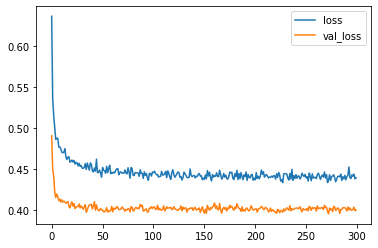

In [56]:
metrics[['loss', 'val_loss']].plot();

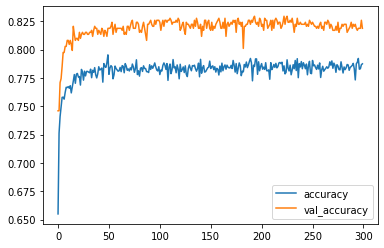

In [57]:
metrics[['accuracy', 'val_accuracy']].plot();

In [58]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1028
           1       0.65      0.47      0.55       379

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                580       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


In [60]:
model_seq_3 = Sequential()
model_seq_3.add(Dense(20, activation='relu',  input_shape=(28,))) # hidden layer 1
model_seq_3.add(Dropout(0.25))
model_seq_3.add(Dense(10, activation="relu"))# hidden layer 2
model_seq_3.add(Dropout(0.25))
model_seq_3.add(Dense(1, activation='sigmoid')) # Ouput layer

In [61]:
model_seq_3.compile(loss='binary_crossentropy',
              optimizer='adam',# paling modern
              metrics=['accuracy'])

In [62]:
history_seq_3 = model_seq_3.fit(X_train, y_train, epochs=300, validation_data=(X_val,y_val))

Epoch 1/300
159/159 [==============================] - 1s 4ms/step - loss: 0.5909 - accuracy: 0.6745 - val_loss: 0.4255 - val_accuracy: 0.8011
Epoch 2/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4884 - accuracy: 0.7683 - val_loss: 0.4037 - val_accuracy: 0.8082
Epoch 3/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4665 - accuracy: 0.7746 - val_loss: 0.4034 - val_accuracy: 0.8064
Epoch 4/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4658 - accuracy: 0.7816 - val_loss: 0.4014 - val_accuracy: 0.8046
Epoch 5/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4559 - accuracy: 0.7806 - val_loss: 0.3979 - val_accuracy: 0.8099
Epoch 6/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4568 - accuracy: 0.7800 - val_loss: 0.3985 - val_accuracy: 0.8135
Epoch 7/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4477 - accuracy: 0.7871 - val_loss: 0.3983 - val_accuracy: 0.8082

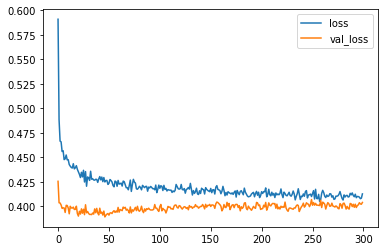

In [63]:
metrics_seq_3 = pd.DataFrame(history_seq_3.history)
metrics_seq_3[['loss', 'val_loss']].plot();

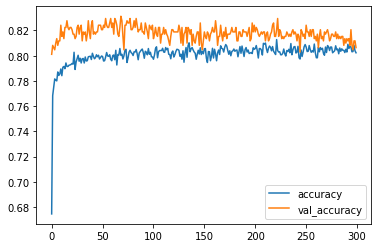

In [64]:
metrics_seq_3[['accuracy', 'val_accuracy']].plot();

## Arsitektur Functional API

In [85]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout

data_input = Input(shape=(28,))
hidden_1 = Dense(20, activation='relu')(data_input)
hidden_drop_1 = Dropout(0.25)(hidden_1)
hidden_2 = Dense(10, activation='relu')(hidden_drop_1)
hidden_drop_2 = Dropout(0.25)(hidden_2)
output = Dense(1, activation='softmax')(hidden_drop_2)

model_func_1 = Model(inputs=data_input, outputs=output)

In [92]:
# compile
model_func_1.compile(loss='binary_crossentropy',
              optimizer='adam', # paling modern
              metrics=['accuracy'])

In [93]:
#Train
history_func_1 = model_func_1.fit(X_train, y_train, epochs=300, validation_data=(X_val, y_val))

Epoch 1/300
159/159 [==============================] - 1s 4ms/step - loss: 30618024.0000 - accuracy: 0.2649 - val_loss: 29675020.0000 - val_accuracy: 0.2593
Epoch 2/300
159/159 [==============================] - 1s 3ms/step - loss: 30159634.0000 - accuracy: 0.2649 - val_loss: 29414788.0000 - val_accuracy: 0.2593
Epoch 3/300
159/159 [==============================] - 1s 3ms/step - loss: 30703340.0000 - accuracy: 0.2649 - val_loss: 29152280.0000 - val_accuracy: 0.2593
Epoch 4/300
159/159 [==============================] - 1s 3ms/step - loss: 29995486.0000 - accuracy: 0.2649 - val_loss: 28894868.0000 - val_accuracy: 0.2593
Epoch 5/300
159/159 [==============================] - 1s 3ms/step - loss: 29838484.0000 - accuracy: 0.2649 - val_loss: 28638534.0000 - val_accuracy: 0.2593
Epoch 6/300
159/159 [==============================] - 1s 3ms/step - loss: 29466248.0000 - accuracy: 0.2649 - val_loss: 28385044.0000 - val_accuracy: 0.2593
Epoch 7/300
159/159 [==============================] - 1s 

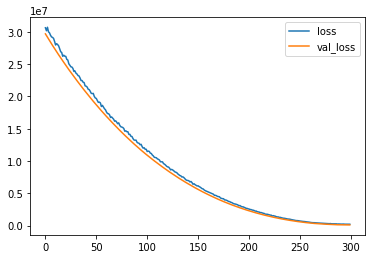

In [94]:
import pandas as pd
metrics_func_1 = pd.DataFrame(history_func_1.history)
metrics_func_1 [['loss', 'val_loss']].plot();

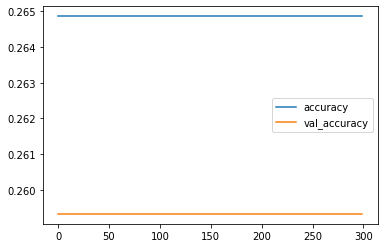

In [95]:
metrics_func_1[['accuracy', 'val_accuracy']].plot();

In [90]:
data_input = Input(shape=(28,))
hidden_1 = Dense(20, activation='relu')(data_input)
hidden_2 = Dense(10, activation='relu')(hidden_1)
output = Dense(1, activation='softmax')(hidden_2)

model_func_2 = Model(inputs=data_input, outputs=output)

In [96]:
model_func_2.compile(loss='binary_crossentropy',
              optimizer='adam', # paling modern
              metrics=['accuracy'])

In [97]:
#Train
history_func_2 = model_func_2.fit(X_train, y_train, epochs=300, validation_data=(X_val, y_val))

Epoch 1/300
159/159 [==============================] - 1s 4ms/step - loss: 0.5294 - accuracy: 0.2649 - val_loss: 0.4332 - val_accuracy: 0.2593
Epoch 2/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4443 - accuracy: 0.2649 - val_loss: 0.4055 - val_accuracy: 0.2593
Epoch 3/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4308 - accuracy: 0.2649 - val_loss: 0.3997 - val_accuracy: 0.2593
Epoch 4/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4262 - accuracy: 0.2649 - val_loss: 0.3939 - val_accuracy: 0.2593
Epoch 5/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4241 - accuracy: 0.2649 - val_loss: 0.3922 - val_accuracy: 0.2593
Epoch 6/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4222 - accuracy: 0.2649 - val_loss: 0.3946 - val_accuracy: 0.2593
Epoch 7/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4206 - accuracy: 0.2649 - val_loss: 0.3951 - val_accuracy: 0.2593

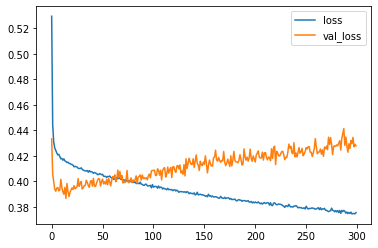

In [98]:
metrics_func_2 = pd.DataFrame(history_func_2.history)
metrics_func_2 [['loss', 'val_loss']].plot();

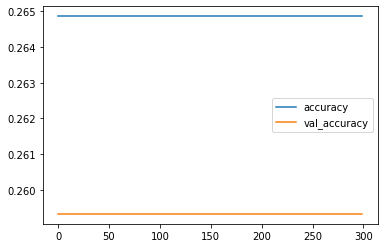

In [99]:
metrics_func_2[['accuracy', 'val_accuracy']].plot();

In [100]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout

data_input = Input(shape=(28,))
hidden_1 = Dense(20, activation='relu')(data_input)
hidden_drop_1 = Dropout(0.25)(hidden_1)
hidden_2 = Dense(10, activation='relu')(hidden_drop_1)
hidden_drop_2 = Dropout(0.25)(hidden_2)
output = Dense(1, activation='sigmoid')(hidden_drop_2)

model_func_3 = Model(inputs=data_input, outputs=output)

In [101]:
model_func_3.compile(loss='binary_crossentropy',
              optimizer='adam', # paling modern
              metrics=['accuracy'])

In [102]:
#Train
history_func_3 = model_func_3.fit(X_train, y_train, epochs=300, validation_data=(X_val, y_val))

Epoch 1/300
159/159 [==============================] - 1s 4ms/step - loss: 0.5398 - accuracy: 0.7284 - val_loss: 0.4316 - val_accuracy: 0.7975
Epoch 2/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4885 - accuracy: 0.7646 - val_loss: 0.4225 - val_accuracy: 0.7833
Epoch 3/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4737 - accuracy: 0.7648 - val_loss: 0.4166 - val_accuracy: 0.7922
Epoch 4/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4555 - accuracy: 0.7766 - val_loss: 0.4079 - val_accuracy: 0.7975
Epoch 5/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4560 - accuracy: 0.7756 - val_loss: 0.4087 - val_accuracy: 0.7975
Epoch 6/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4503 - accuracy: 0.7768 - val_loss: 0.4074 - val_accuracy: 0.8046
Epoch 7/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4466 - accuracy: 0.7926 - val_loss: 0.4083 - val_accuracy: 0.8028

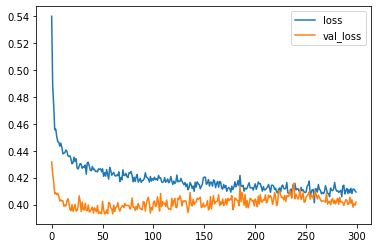

In [103]:
metrics_func_3 = pd.DataFrame(history_func_3.history)
metrics_func_3 [['loss', 'val_loss']].plot();

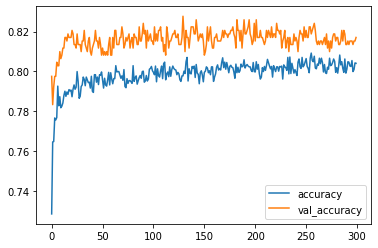

In [104]:
metrics_func_3[['accuracy', 'val_accuracy']].plot();

In [105]:
data_input = Input(shape=(28,))
hidden_1 = Dense(20, activation='relu')(data_input)
hidden_2 = Dense(10, activation='relu')(hidden_1)
output = Dense(1, activation='sigmoid')(hidden_2)

model_func_4 = Model(inputs=data_input, outputs=output)

In [106]:
model_func_4.compile(loss='binary_crossentropy',
              optimizer='adam', # paling modern
              metrics=['accuracy'])

In [107]:
#Train
history_func_4 = model_func_4.fit(X_train, y_train, epochs=300, validation_data=(X_val, y_val))

Epoch 1/300
159/159 [==============================] - 1s 4ms/step - loss: 0.4882 - accuracy: 0.7658 - val_loss: 0.4070 - val_accuracy: 0.8064
Epoch 2/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4333 - accuracy: 0.7897 - val_loss: 0.3954 - val_accuracy: 0.8171
Epoch 3/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4266 - accuracy: 0.7962 - val_loss: 0.3956 - val_accuracy: 0.8171
Epoch 4/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4241 - accuracy: 0.7958 - val_loss: 0.3876 - val_accuracy: 0.8171
Epoch 5/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4224 - accuracy: 0.7970 - val_loss: 0.3958 - val_accuracy: 0.8188
Epoch 6/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4196 - accuracy: 0.7987 - val_loss: 0.3882 - val_accuracy: 0.8188
Epoch 7/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4206 - accuracy: 0.7999 - val_loss: 0.3933 - val_accuracy: 0.8171

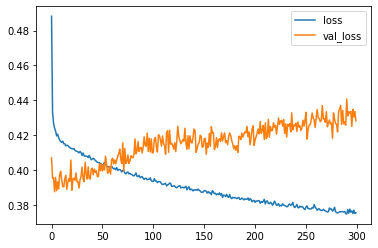

In [108]:
metrics_func_4 = pd.DataFrame(history_func_4.history)
metrics_func_4 [['loss', 'val_loss']].plot();

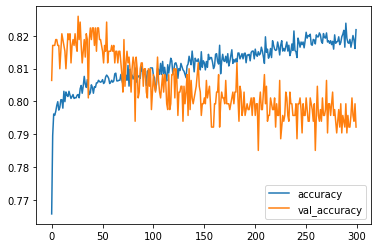

In [109]:
metrics_func_4 [['accuracy', 'val_accuracy']].plot();

In [110]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout

data_input = Input(shape=(28,))
hidden_1 = Dense(20, activation='elu')(data_input)
hidden_drop_1 = Dropout(0.25)(hidden_1)
hidden_2 = Dense(10, activation='elu')(hidden_drop_1)
hidden_drop_2 = Dropout(0.25)(hidden_2)
output = Dense(1, activation='sigmoid')(hidden_drop_2)

model_func_5 = Model(inputs=data_input, outputs=output)

In [111]:
model_func_5.compile(loss='binary_crossentropy',
              optimizer='adam', # paling modern
              metrics=['accuracy'])

In [113]:
#Train
history_func_5 = model_func_5.fit(X_train, y_train, epochs=300, validation_data=(X_val, y_val))

Epoch 1/300
159/159 [==============================] - 1s 4ms/step - loss: 0.5227 - accuracy: 0.7369 - val_loss: 0.3983 - val_accuracy: 0.8064
Epoch 2/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4596 - accuracy: 0.7829 - val_loss: 0.3947 - val_accuracy: 0.8064
Epoch 3/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4542 - accuracy: 0.7841 - val_loss: 0.3943 - val_accuracy: 0.8171
Epoch 4/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4434 - accuracy: 0.7879 - val_loss: 0.3913 - val_accuracy: 0.8171
Epoch 5/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4424 - accuracy: 0.7964 - val_loss: 0.3916 - val_accuracy: 0.8171
Epoch 6/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4408 - accuracy: 0.7881 - val_loss: 0.3926 - val_accuracy: 0.8117
Epoch 7/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4414 - accuracy: 0.7900 - val_loss: 0.3908 - val_accuracy: 0.8224

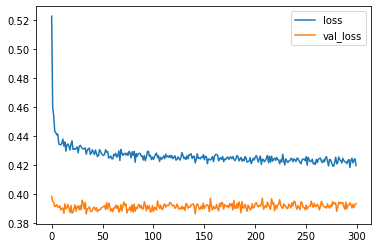

In [114]:
metrics_func_5 = pd.DataFrame(history_func_5.history)
metrics_func_5[['loss', 'val_loss']].plot();

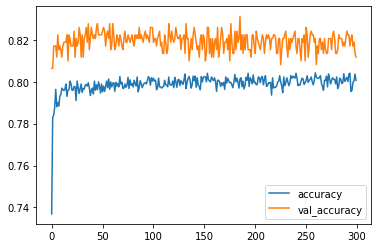

In [115]:
metrics_func_5[['accuracy', 'val_accuracy']].plot();

In [116]:
data_input = Input(shape=(28,))
hidden_1 = Dense(20, activation='relu')(data_input)
hidden_drop_1 = Dropout(0.5)(hidden_1)
hidden_2 = Dense(10, activation='relu')(hidden_drop_1)
hidden_drop_2 = Dropout(0.5)(hidden_2)
output = Dense(1, activation='sigmoid')(hidden_drop_2)

model_func_6 = Model(inputs=data_input, outputs=output)

In [117]:
model_func_6.compile(loss='binary_crossentropy',
              optimizer='adam', # paling modern
              metrics=['accuracy'])

In [118]:
#Train
history_func_6 = model_func_6.fit(X_train, y_train, epochs=300, validation_data=(X_val, y_val))

Epoch 1/300
159/159 [==============================] - 1s 4ms/step - loss: 0.6551 - accuracy: 0.6401 - val_loss: 0.5294 - val_accuracy: 0.7478
Epoch 2/300
159/159 [==============================] - 1s 3ms/step - loss: 0.5532 - accuracy: 0.7330 - val_loss: 0.4527 - val_accuracy: 0.7442
Epoch 3/300
159/159 [==============================] - 0s 3ms/step - loss: 0.5131 - accuracy: 0.7434 - val_loss: 0.4399 - val_accuracy: 0.7460
Epoch 4/300
159/159 [==============================] - 0s 3ms/step - loss: 0.5069 - accuracy: 0.7444 - val_loss: 0.4299 - val_accuracy: 0.7425
Epoch 5/300
159/159 [==============================] - 0s 3ms/step - loss: 0.5021 - accuracy: 0.7555 - val_loss: 0.4276 - val_accuracy: 0.7691
Epoch 6/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4906 - accuracy: 0.7523 - val_loss: 0.4264 - val_accuracy: 0.7584
Epoch 7/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4883 - accuracy: 0.7553 - val_loss: 0.4276 - val_accuracy: 0.7638

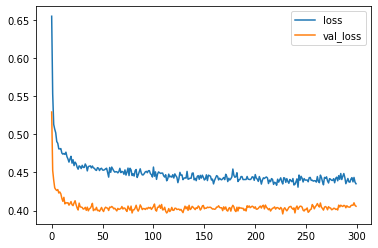

In [119]:
metrics_func_6 = pd.DataFrame(history_func_6.history)
metrics_func_6[['loss', 'val_loss']].plot();

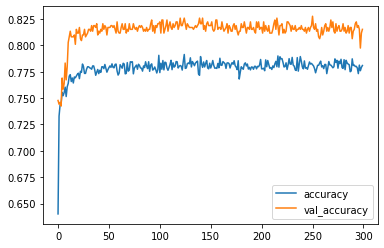

In [120]:
metrics_func_6[['accuracy', 'val_accuracy']].plot();

In [121]:
data_input = Input(shape=(28,))
hidden_1 = Dense(15, activation='relu')(data_input)
hidden_drop_1 = Dropout(0.25)(hidden_1)
output = Dense(1, activation='sigmoid')(hidden_drop_1)

model_func_7 = Model(inputs=data_input, outputs=output)

In [122]:
model_func_7.compile(loss='binary_crossentropy',
              optimizer='adam', # paling modern
              metrics=['accuracy'])

In [123]:
#Train
history_func_7 = model_func_7.fit(X_train, y_train, epochs=300, validation_data=(X_val, y_val))

Epoch 1/300
159/159 [==============================] - 1s 4ms/step - loss: 0.5926 - accuracy: 0.6808 - val_loss: 0.4468 - val_accuracy: 0.7975
Epoch 2/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4758 - accuracy: 0.7768 - val_loss: 0.4069 - val_accuracy: 0.8242
Epoch 3/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4590 - accuracy: 0.7808 - val_loss: 0.3970 - val_accuracy: 0.8206
Epoch 4/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4427 - accuracy: 0.7922 - val_loss: 0.3939 - val_accuracy: 0.8188
Epoch 5/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4428 - accuracy: 0.7867 - val_loss: 0.3922 - val_accuracy: 0.8224
Epoch 6/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4400 - accuracy: 0.7954 - val_loss: 0.3921 - val_accuracy: 0.8242
Epoch 7/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4381 - accuracy: 0.7942 - val_loss: 0.3915 - val_accuracy: 0.8259

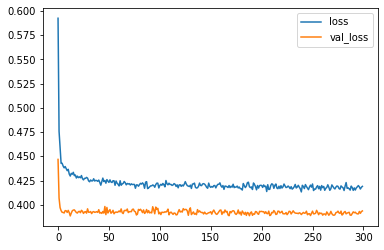

In [124]:
metrics_func_7 = pd.DataFrame(history_func_7.history)
metrics_func_7[['loss', 'val_loss']].plot();

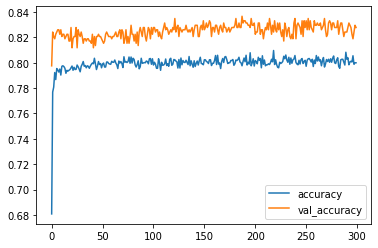

In [125]:
metrics_func_7[['accuracy', 'val_accuracy']].plot();

In [127]:
data_input = Input(shape=(28,))
hidden_1 = Dense(25, activation='relu')(data_input)
hidden_drop_1 = Dropout(0.25)(hidden_1)
hidden_2 = Dense(15, activation='relu')(hidden_drop_1)
hidden_drop_2 = Dropout(0.25)(hidden_2)
hidden_3 = Dense(5, activation='relu')(hidden_drop_2)
hidden_drop_3 = Dropout(0.25)(hidden_3)
output = Dense(1, activation='sigmoid')(hidden_drop_3)

model_func_8 = Model(inputs=data_input, outputs=output)

In [128]:
model_func_8.compile(loss='binary_crossentropy',
              optimizer='adam', # paling modern
              metrics=['accuracy'])

In [129]:
#Train
history_func_8 = model_func_8.fit(X_train, y_train, epochs=300, validation_data=(X_val, y_val))

Epoch 1/300
159/159 [==============================] - 2s 4ms/step - loss: 0.6957 - accuracy: 0.6135 - val_loss: 0.6610 - val_accuracy: 0.7407
Epoch 2/300
159/159 [==============================] - 1s 3ms/step - loss: 0.6454 - accuracy: 0.7553 - val_loss: 0.6220 - val_accuracy: 0.8046
Epoch 3/300
159/159 [==============================] - 1s 3ms/step - loss: 0.6158 - accuracy: 0.7677 - val_loss: 0.5873 - val_accuracy: 0.8028
Epoch 4/300
159/159 [==============================] - 1s 3ms/step - loss: 0.5456 - accuracy: 0.7737 - val_loss: 0.4291 - val_accuracy: 0.8099
Epoch 5/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4915 - accuracy: 0.7738 - val_loss: 0.4090 - val_accuracy: 0.8224
Epoch 6/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4797 - accuracy: 0.7851 - val_loss: 0.4134 - val_accuracy: 0.8206
Epoch 7/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4766 - accuracy: 0.7800 - val_loss: 0.4191 - val_accuracy: 0.8117

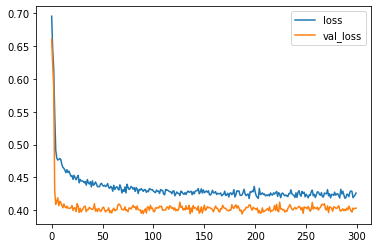

In [130]:
metrics_func_8 = pd.DataFrame(history_func_8.history)
metrics_func_8[['loss', 'val_loss']].plot();

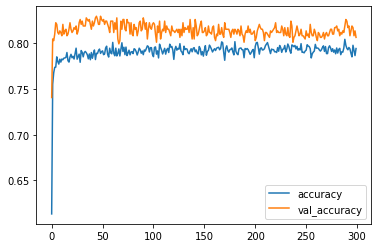

In [131]:
metrics_func_8[['accuracy', 'val_accuracy']].plot();

In [132]:
data_input = Input(shape=(28,))
hidden_1 = Dense(15, activation='elu')(data_input)
hidden_drop_1 = Dropout(0.25)(hidden_1)
output = Dense(1, activation='sigmoid')(hidden_drop_1)

model_func_9 = Model(inputs=data_input, outputs=output)

In [133]:
model_func_9.compile(loss='binary_crossentropy',
              optimizer='adam', # paling modern
              metrics=['accuracy'])

In [136]:
#Train
history_func_9 = model_func_9.fit(X_train, y_train, epochs=300, validation_data=(X_val, y_val))

Epoch 1/300
159/159 [==============================] - 1s 4ms/step - loss: 0.5662 - accuracy: 0.6937 - val_loss: 0.4093 - val_accuracy: 0.8206
Epoch 2/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4569 - accuracy: 0.7802 - val_loss: 0.3975 - val_accuracy: 0.8188
Epoch 3/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4516 - accuracy: 0.7847 - val_loss: 0.3949 - val_accuracy: 0.8099
Epoch 4/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4491 - accuracy: 0.7900 - val_loss: 0.3944 - val_accuracy: 0.8135
Epoch 5/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4376 - accuracy: 0.7964 - val_loss: 0.3921 - val_accuracy: 0.8171
Epoch 6/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4384 - accuracy: 0.7920 - val_loss: 0.3923 - val_accuracy: 0.8082
Epoch 7/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4382 - accuracy: 0.7946 - val_loss: 0.3930 - val_accuracy: 0.8117

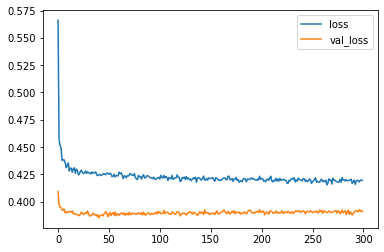

In [137]:
metrics_func_9 = pd.DataFrame(history_func_9.history)
metrics_func_9[['loss', 'val_loss']].plot();

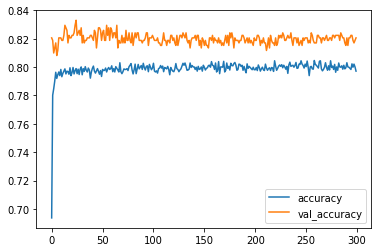

In [138]:
metrics_func_9[['accuracy', 'val_accuracy']].plot();

In [139]:
data_input = Input(shape=(28,))
hidden_1 = Dense(25, activation='elu')(data_input)
hidden_drop_1 = Dropout(0.25)(hidden_1)
hidden_2 = Dense(15, activation='elu')(hidden_drop_1)
hidden_drop_2 = Dropout(0.25)(hidden_2)
hidden_3 = Dense(5, activation='elu')(hidden_drop_2)
hidden_drop_3 = Dropout(0.25)(hidden_3)
output = Dense(1, activation='sigmoid')(hidden_drop_3)

model_func_10 = Model(inputs=data_input, outputs=output)

In [140]:
model_func_10.compile(loss='binary_crossentropy',
              optimizer='adam', # paling modern
              metrics=['accuracy'])

In [141]:
#Train
history_func_10 = model_func_10.fit(X_train, y_train, epochs=300, validation_data=(X_val, y_val))

Epoch 1/300
159/159 [==============================] - 1s 4ms/step - loss: 0.5994 - accuracy: 0.6656 - val_loss: 0.4184 - val_accuracy: 0.8011
Epoch 2/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4796 - accuracy: 0.7740 - val_loss: 0.4064 - val_accuracy: 0.8153
Epoch 3/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4616 - accuracy: 0.7823 - val_loss: 0.3955 - val_accuracy: 0.8171
Epoch 4/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4525 - accuracy: 0.7814 - val_loss: 0.3906 - val_accuracy: 0.8206
Epoch 5/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4501 - accuracy: 0.7908 - val_loss: 0.3925 - val_accuracy: 0.8135
Epoch 6/300
159/159 [==============================] - 0s 3ms/step - loss: 0.4483 - accuracy: 0.7847 - val_loss: 0.3925 - val_accuracy: 0.8153
Epoch 7/300
159/159 [==============================] - 1s 3ms/step - loss: 0.4456 - accuracy: 0.7914 - val_loss: 0.3923 - val_accuracy: 0.8206

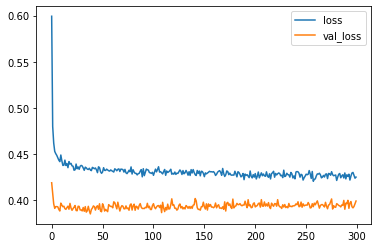

In [142]:
metrics_func_10 = pd.DataFrame(history_func_10.history)
metrics_func_10[['loss', 'val_loss']].plot();

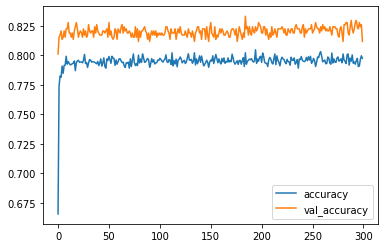

In [143]:
metrics_func_10[['accuracy', 'val_accuracy']].plot();

#### Model 1:

- Hidden Layer: 2
- Activation: Relu
- Activation output: Softmax
- Epoch: 300
- Dropout:0.25
- Catatan: Nilai loss train dan val sangat berdekatan namun nilainya sangat besra, serta nilai akurasi pada train dan valnya vanishing dan sangat kecil.


#### Model 2:

- Hidden Layer: 2
- Activation: Relu
- Activation output: Softmax
- Epoch: 300
- Tidak ada Dropout
- Catatan: Nilai loss train dan val saling berjauhan, serta nilai akurasi pada train dan valnya vanishing dan sangat kecil.


#### Model 3:

- Hidden Layer: 2
- Activation: Relu
- Activation output: Sigmoid
- Epoch: 300
- Dropout:0.25
- Catatan: Jarak train dan val sedikit berdekatan, dan pada nilai loss jarak keduanya sangat berdekatan, tetapi model masih underfit.

#### Model 4:

- Hidden Layer: 2
- Activation: Relu
- Activation output: Sigmoid
- Epoch: 300
- Tidak ada Dropout
- Catatan: Jakar val dan train saling berjauhan satu sama lain, dan nilai val pada akurasi sedikit explode. 


#### Model 5:

- Hidden Layer: 2
- Activation: elu
- Activation output: Sigmoid
- Epoch: 300
- Dropout:0.25
- Catatan: Jarak train dan val sedikit berdekatan dan model underfit dan nilai val pada akurasi sedikit explode.

#### Model 6:

- Hidden Layer: 2
- Activation: Relu
- Activation output: Sigmoid
- Epoch: 300
- Dropout:0.5
- Catatan: Jarak train dan val sedikit berdekatan dan model underfit.

#### Model 7:

- Hidden Layer: 1
- Activation: Relu
- Activation output: Sigmoid
- Epoch: 300
- Dropout:0.25
- Catatan: Jarak train dan val sedikit berdekatan dan model underfit.

#### Model 8:

- Hidden Layer: 3
- Activation: Relu
- Activation output: Sigmoid
- Epoch: 300
- Dropout:0.25
- Catatan: Jarak train dan val lumayan berdekatan dan model underfit.

#### Model 9:

- Hidden Layer: 1
- Activation: elu
- Activation output: Sigmoid
- Epoch: 300
- Dropout:0.25
- Catatan: Jarak train dan val sedikit berdekatan dan model underfit.

#### Model 10:

- Hidden Layer: 3
- Activation: elu
- Activation output: Sigmoid
- Epoch: 300
- Dropout: 0.25
- Catatan: Jarak train dan val sedikit berdekatan dan model underfit.


#### Kesimpulan: Diputuskan untuk menggunakan Model 3, karena model tersebut yang paling mendekati good-fit. Untuk layer output tidak cocok digunakan softmax, lebih cocok menggunakan sigmoid, dan menggunakan relu dan elu hampir sama saja. 

